In [ ]:
#Statistical Visualization and Machine Learning Analysis applied to a Heart Disease DataSet.
#Author: Fábio de Andrade Chacon

In [ ]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import colorsys
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

Columns
age age in years
sex(1 = male; 0 = female)
cpchest pain type
trestbps resting blood pressure (in mm Hg on admission to the hospital)
chol serum cholestoral in mg/dl
fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg resting electrocardiographic results
thalach maximum heart rate achieved
exang exercise induced angina (1 = yes; 0 = no)
oldpeakST depression induced by exercise relative to rest
slopethe slope of the peak exercise ST segment
canumber of major vessels (0-3) colored by flourosopy
thal3 = normal; 6 = fixed defect; 7 = reversable defect
target1 or 0

In [3]:
df = pd.read_csv(r"C:\Users\fabio\Documents\DataSets\csv_data\heart.csv")

In [50]:
df.columns 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [62]:
df['age'].std()

9.082100989837858

In [11]:
#data = df.drop('target', axis=1).drop(axis=1, index=0)

In [12]:
validate = df.iloc[0:1, :-1]

In [13]:
data, data_labels = df.iloc[1:, :-1].values, df.iloc[1:, -1:].values

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.30, stratify=data_labels)

In [15]:
x_train.shape

(211, 13)

In [16]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [23]:
lr = LogisticRegression(C=1000, random_state=0)
lr.fit(x_train_std, y_train.ravel())
y_pred = lr.predict(x_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test.ravel(), y_pred))

Accuracy: 0.87


In [47]:
lr.predict(x_test[0:3, :])

array([0, 0, 0], dtype=int64)

In [18]:
target = lr.predict(validate)
print("Logistic Regression prediction: ", str(target))

Logistic Regression prediction:  [0]


In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train_std, y_train.ravel())
y_pred = model.predict(x_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.88


In [20]:
target = model.predict(validate)
print("Naive Bayes prediction: ", str(target))

Naive Bayes prediction:  [1]


In [21]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, C=3.0)
svm.fit(x_train_std, y_train.ravel())
y_pred = svm.predict(x_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.81


In [22]:
target = svm.predict(validate)
print("SVM prediction: ", str(target))

SVM prediction:  [1]


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [64]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (10, 6)})

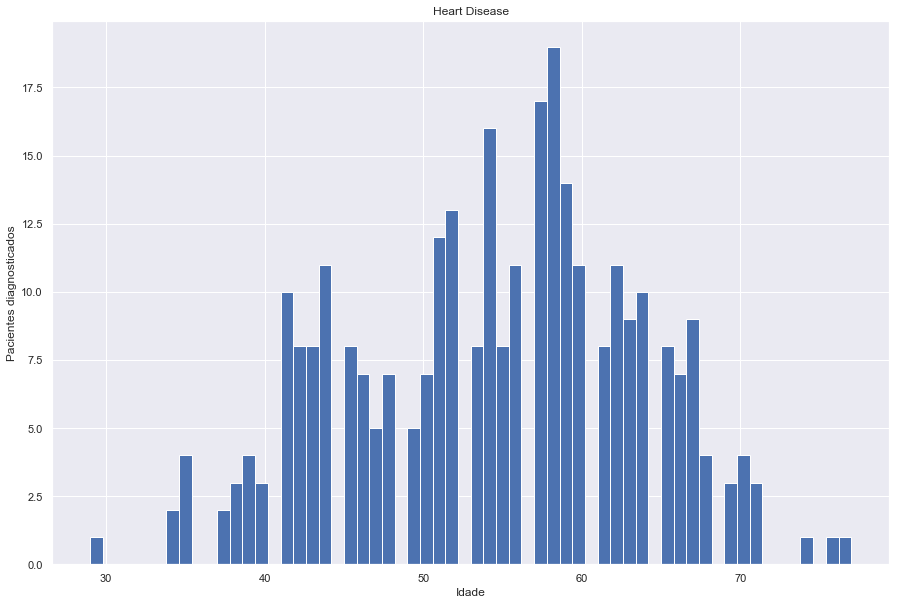

In [60]:
df.age.hist(bins=60)
plt.xlabel('Idade')
plt.ylabel('Pacientes diagnosticados')
plt.title('Heart Disease')
plt.show()

Text(0.5,1,'Quantidade de pacientes diagnosticados')

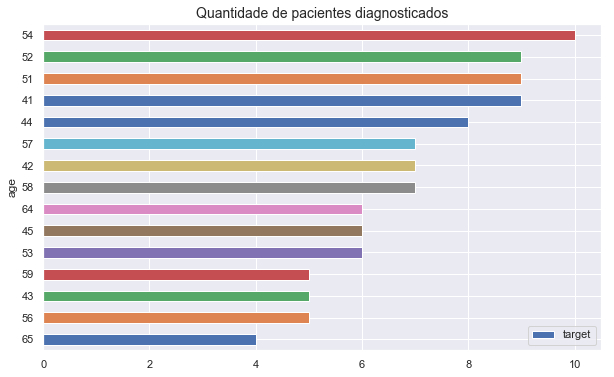

In [83]:
ax = df.groupby(['age'])['target'].aggregate(sum).reset_index().sort_values(['target'], ascending=True)
ax = ax.tail(15).plot(kind='barh', x='age', y='target')
ax.set_title("Quantidade de pacientes diagnosticados", fontsize=14)

C:\Users\fabio\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


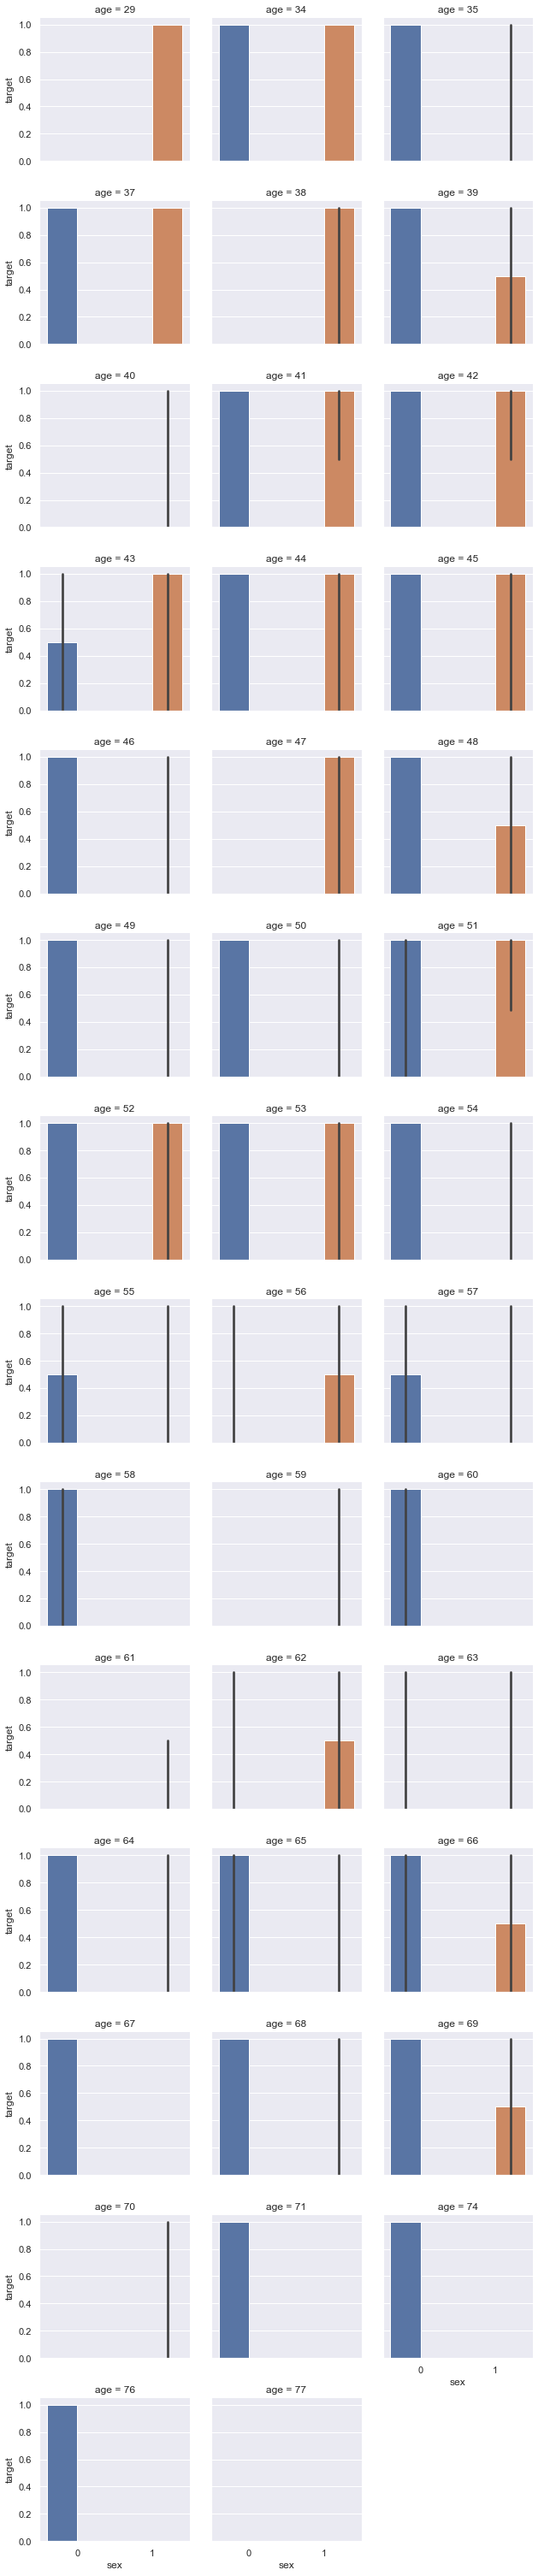

In [62]:
from numpy import median
sns.catplot(x='sex', y='target', col='age', hue='sex', estimator=median, data=df, height=3, col_wrap=3, kind='bar')

C:\Users\fabio\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


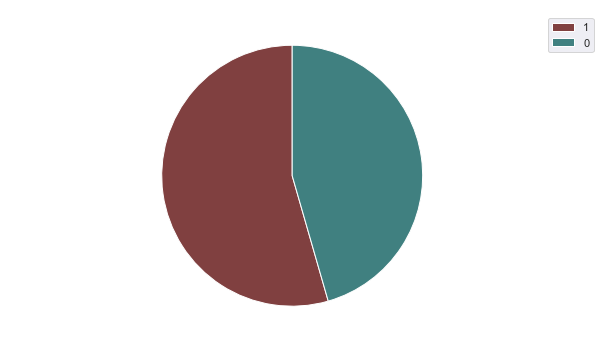

In [67]:
labels = df.sex.value_counts().index
num = len(df.target.value_counts().index)

HSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
RGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV))

fatias, texto = plt.pie(df.target.value_counts(), colors = RGB, 
                        startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05,1))
plt.title("")
plt.show()


C:\Users\fabio\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


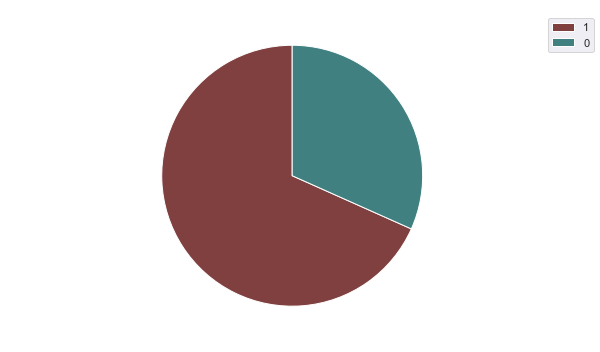

In [66]:
labels = df.sex.value_counts().index
num = len(df.target.value_counts().index)

HSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
RGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV))
colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 
          'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

fatias, texto = plt.pie(df.sex.value_counts(), colors = RGB, 
                        startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05,1))
plt.title("")
plt.show()

C:\Users\fabio\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


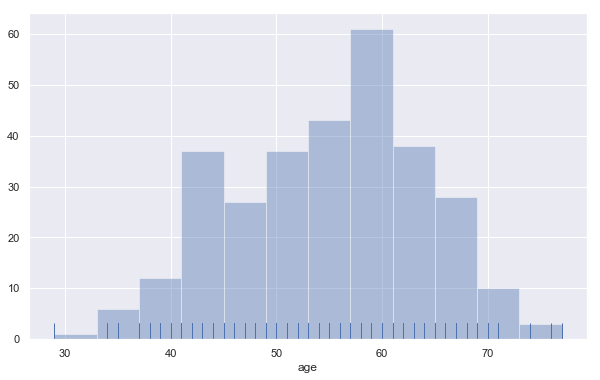

In [70]:
sns.distplot(df.age, kde=False, rug=True)

C:\Users\fabio\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


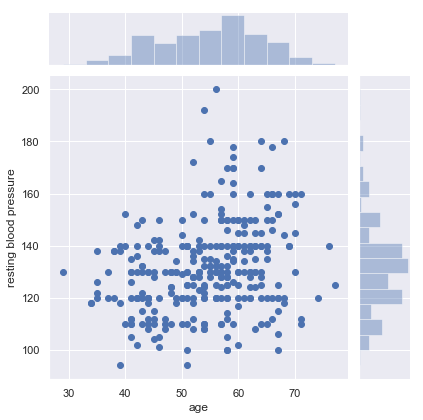

In [82]:
col_rename = {'trestbps' : 'resting blood pressure'}
df.rename(columns=col_rename)
sns.jointplot(x='age', y='resting blood pressure', data=df)